## Rollercoaster Exploration
pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. The name is derived from the term “panel data”, an econometrics term for multidimensional structured data sets. 

We'll be using pandas to explore the HiMCM 2018 Rollercoaster challenge located here:

https://www.comap.com/highschool/contests/himcm/2018problems.html

We can read in the Rollercoaster csv file into a pandas data frame:

In [1]:
import pandas as pd
coasters = pd.read_csv('rollercoaster.csv')

To view the first few rows of the dataframe, we can use head:

In [2]:
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),CoasterBuzz Ranking
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006,98.4,45.0,2788.8,YES,10,NaN,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006,151.6,65.2,1476.4,YES,2,NaN,1:00,4,NaN,NaN
2,Adrenaline Peak,Oaks Amusement Park,Portland,Oregon,United States,North America,Steel,Sit Down,Operating,2018,72,45.0,1050.0,YES,3,NaN,NaN,NaN,97.0,NaN
3,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999,113,62.0,2956.0,YES,6,NaN,2:47,NaN,NaN,4.11379
4,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997,195,67.0,3828.0,YES,6,170,3:10,3.7,NaN,4.07529


To view the shape:

In [5]:
coasters.shape

(305, 20)

To view the columns:

In [6]:
coasters.columns

Index(['Name', 'Park', 'City/Region', 'City/State/Region', 'Country/Region',
       'Geographic Region', 'Construction', 'Type', 'Status',
       'Year/Date Opened', 'Height (feet)', ' Speed (mph)', 'Length (feet)',
       'Inversions (YES or NO)', 'Number of Inversions', 'Drop (feet)',
       'Duration (min:sec)', 'G Force', 'Vertical Angle (degrees)',
       'Unnamed: 19'],
      dtype='object')

## 1. Data Cleaning

Note that the "Speed (mph)" column has an extra space at the beginning of its name. It is common that there is extra space when you read in a file. This space is problematic when you want to refer to a column by name. Thus, we want to strip all extra whitespace from the column names using this command:

In [3]:
coasters.columns = coasters.columns.str.strip()

Now, the extra space is removed:

In [8]:
coasters.columns

Index(['Name', 'Park', 'City/Region', 'City/State/Region', 'Country/Region',
       'Geographic Region', 'Construction', 'Type', 'Status',
       'Year/Date Opened', 'Height (feet)', 'Speed (mph)', 'Length (feet)',
       'Inversions (YES or NO)', 'Number of Inversions', 'Drop (feet)',
       'Duration (min:sec)', 'G Force', 'Vertical Angle (degrees)',
       'Unnamed: 19'],
      dtype='object')

In large data files, there is usually a lot of missing info. To see how many entries are null (empty) in each column, we can type:

In [9]:
coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 20 columns):
Name                        300 non-null object
Park                        300 non-null object
City/Region                 300 non-null object
City/State/Region           300 non-null object
Country/Region              300 non-null object
Geographic Region           300 non-null object
Construction                300 non-null object
Type                        300 non-null object
Status                      300 non-null object
Year/Date Opened            300 non-null float64
Height (feet)               299 non-null object
Speed (mph)                 296 non-null float64
Length (feet)               295 non-null float64
Inversions (YES or NO)      300 non-null object
Number of Inversions        300 non-null float64
Drop (feet)                 142 non-null object
Duration (min:sec)          224 non-null object
G Force                     83 non-null object
Vertical Angle (degrees)    

Notice that out of 305 rows, there is very few data missing from the important columns 'Year/Date Opened', 'Height (feet)', 'Speed (mph)', 'Length (feet)', 'Number of Inversions'. Thus, let's decide to drop any coasters that are missing any info in one of these five rows. It will reduce our dataset to 291 coasters:

In [16]:
coasters = coasters.dropna(subset = ['Year/Date Opened', 'Height (feet)', 'Speed (mph)', 'Length (feet)', 'Number of Inversions'])
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,NaN,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,NaN,1:00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,NaN,2:47,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.0,3:10,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,NaN,NaN,4.3,NaN,NaN


Some of the columns have categorical data (Steel, wood, etc) and some have quantitative data. Let's see which columns have which type:

In [9]:
coasters.dtypes

Name                         object
Park                         object
City/Region                  object
City/State/Region            object
Country/Region               object
Geographic Region            object
Construction                 object
Type                         object
Status                       object
Year/Date Opened            float64
Height (feet)                object
Speed (mph)                 float64
Length (feet)               float64
Inversions (YES or NO)       object
Number of Inversions        float64
Drop (feet)                  object
Duration (min:sec)           object
G Force                      object
Vertical Angle (degrees)    float64
Unnamed: 19                 float64
dtype: object

This is strange...we expected height, speed, and length to have quantitative data (denoted by float64) but instead we see that height has categorical data (denoted by "object"). Let's investigate why:

In [10]:
coasters['Height (feet)'][100:120]

102      46.0
103     325.0
104     131.3
105     170.0
106     125.3
107     118.0
108      70.0
109      73.0
110     235.0
111    200 ft
112     105.0
113     191.6
114     165.0
115     118.0
116     108.0
117     108.3
118     205.0
119      91.0
120     136.0
121      98.4
Name: Height (feet), dtype: object

Notice that in the 111th row, the height is "200 ft" instead of just "200". Let's change this.

In [11]:
coasters.loc[111, 'Height (feet)'] = 200

Notice that the height datatype is still an object:

In [12]:
coasters.dtypes

Name                         object
Park                         object
City/Region                  object
City/State/Region            object
Country/Region               object
Geographic Region            object
Construction                 object
Type                         object
Status                       object
Year/Date Opened            float64
Height (feet)                object
Speed (mph)                 float64
Length (feet)               float64
Inversions (YES or NO)       object
Number of Inversions        float64
Drop (feet)                  object
Duration (min:sec)           object
G Force                      object
Vertical Angle (degrees)    float64
Unnamed: 19                 float64
dtype: object

However, we can now change it to a float (decimal):

In [12]:
coasters['Height (feet)'] = coasters['Height (feet)'].astype(float)

Let's also reduce our considerations to just rollercoasters that are operating. This will reduce our dataset from 291 to 280:

In [13]:
coasters = coasters[coasters['Status'] == 'Operating']
coasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 299
Data columns (total 20 columns):
Name                        281 non-null object
Park                        281 non-null object
City/Region                 281 non-null object
City/State/Region           281 non-null object
Country/Region              281 non-null object
Geographic Region           281 non-null object
Construction                281 non-null object
Type                        281 non-null object
Status                      281 non-null object
Year/Date Opened            281 non-null float64
Height (feet)               281 non-null float64
Speed (mph)                 281 non-null float64
Length (feet)               281 non-null float64
Inversions (YES or NO)      281 non-null object
Number of Inversions        281 non-null float64
Drop (feet)                 133 non-null object
Duration (min:sec)          213 non-null object
G Force                     79 non-null object
Vertical Angle (degrees)   

Note that when you drop rows, the index doesn't reset automatically. We see that we are missing the second row:

In [15]:
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,NaN,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,NaN,1:00,4,NaN,NaN
3,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,NaN,2:47,NaN,NaN,NaN
4,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.0,3:10,3.7,NaN,NaN
5,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,NaN,NaN,4.3,NaN,NaN


We can reset the index so that the index numbers go in order:

In [14]:
coasters = coasters.reset_index(drop=True)
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,NaN,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,NaN,1:00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,NaN,2:47,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.0,3:10,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,NaN,NaN,4.3,NaN,NaN


Notice that the column Drop is considered an object not a number:

In [17]:
coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 20 columns):
Name                        281 non-null object
Park                        281 non-null object
City/Region                 281 non-null object
City/State/Region           281 non-null object
Country/Region              281 non-null object
Geographic Region           281 non-null object
Construction                281 non-null object
Type                        281 non-null object
Status                      281 non-null object
Year/Date Opened            281 non-null float64
Height (feet)               281 non-null float64
Speed (mph)                 281 non-null float64
Length (feet)               281 non-null float64
Inversions (YES or NO)      281 non-null object
Number of Inversions        281 non-null float64
Drop (feet)                 133 non-null object
Duration (min:sec)          213 non-null object
G Force                     79 non-null object
Vertical Angle (degrees)   

This is because some entries have an empty space character " " in them. Let's replace this with an empty numerical cell ("NaN"):

In [15]:
import numpy as np
coasters = coasters.replace(' ',np.NaN)

By doing this, we'll now be able to change the column to a numerical datatype, and we'll be able to fill the empty entries in the numerical columns we care about with the average value of that column:

In [19]:
coasters['Drop (feet)'] = coasters['Drop (feet)'].astype(float)
coasters['Drop (feet)'] = coasters['Drop (feet)'].fillna(coasters['Drop (feet)'].mean()).round(2)

coasters['Year/Date Opened'] = coasters['Year/Date Opened'].astype(float)
coasters['Year/Date Opened'] = coasters['Year/Date Opened'].fillna(coasters['Year/Date Opened'].mean()).round(2)

coasters['Height (feet)'] = coasters['Height (feet)'].astype(float)
coasters['Height (feet)'] = coasters['Height (feet)'].fillna(coasters['Height (feet)'].mean()).round(2)

coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,1:00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,2:47,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,3:10,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,NaN,4.3,NaN,NaN


## 2. Some Basic Pandas Data Analysis

If you wanted to plot a histogram of date opened:

In [19]:
coasters.to_csv('rollercoasters_clean.csv')

(array([ 2.,  2.,  0.,  0.,  3., 12., 20., 76., 96., 70.]),
 array([1924. , 1933.4, 1942.8, 1952.2, 1961.6, 1971. , 1980.4, 1989.8,
        1999.2, 2008.6, 2018. ]),
 <a list of 10 Patch objects>)

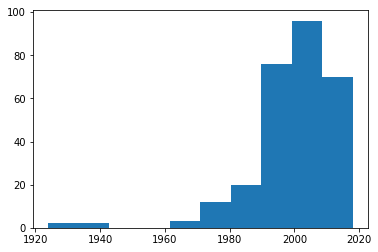

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(coasters['Year/Date Opened'])

Some basic descriptive statistics about the year built:

In [21]:
print(coasters['Year/Date Opened'].mean())
print(coasters['Year/Date Opened'].median())
print(coasters['Year/Date Opened'].max())
print(coasters['Year/Date Opened'].min())

2000.2775800711743
2001.0
2018.0
1924.0


What was the oldest rollercoaster?

In [22]:
min_year = coasters['Year/Date Opened'].min()
coasters[coasters['Year/Date Opened'] == min_year]

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
102,Giant Dipper,Santa Cruz Beach Boardwalk,Santa Cruz,California,United States,North America,Wood,Sit Down,Operating,1924.0,70.0,55.0,2640.0,NO,0.0,65.0,1:52,NaN,NaN,NaN


To plot speed versus height:

Text(0, 0.5, 'height')

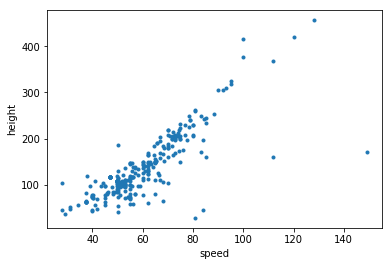

In [23]:
plt.plot(coasters['Speed (mph)'], coasters['Height (feet)'], '.')
plt.xlabel("speed")
plt.ylabel('height')

To plot a line of best fit:

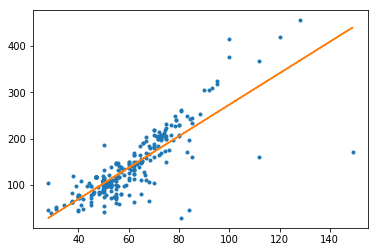

In [24]:
import numpy as np

x = coasters['Speed (mph)']
y = coasters['Height (feet)']
fit = np.polyfit(x, y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y,'.', x, fit_fn(x))

Which coasters are higher? North America or Asia? These are the means of both:

In [25]:
print('North America', coasters[coasters['Geographic Region'] == "North America"]['Height (feet)'].mean())
print('Asia', coasters[coasters['Geographic Region'] == "Asia"]['Height (feet)'].mean())

North America 140.17804878048776
Asia 173.072


We can do a two-sided two-sample t test to really compare:

In [26]:
from scipy import stats
american_height = coasters[coasters['Geographic Region'] == "North America"]['Height (feet)']
asian_height = coasters[coasters['Geographic Region'] == "Asia"]['Height (feet)']
t, p = stats.ttest_ind(american_height, asian_height)
print("t = " + str(t))
print("p = " + str(p))


t = -2.2636360134511606
p = 0.02474513807080328


Since 0.024 < 5, we conclude that the height of the American coasters is significantly different than the height of the Asian coasters.

## 3. Datetime (optional section, you can skip down)

Date time is a package that allows us to work with dates and times easily. It will help us convert the duration column (currently in the form Minutes:Seconds) into simply seconds.

First, let's fill both the "NaN" as well as the " " entries with a duration of 0:00 temporarily:

In [27]:
coasters['Duration (min:sec)'] = coasters['Duration (min:sec)'].fillna('0:00')
coasters['Duration (min:sec)'] = coasters['Duration (min:sec)'].replace(' ', '0:00')
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,1:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,1:00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,2:47,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,3:10,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,0:00,4.3,NaN,NaN


Now that the entire column is in a minute:second format, we are able to convert this column to a datetime object. A datetime object has built-in properties that will allow us to work with dates and times more easily:

In [28]:
coasters['Duration (min:sec)'] = pd.to_datetime(coasters['Duration (min:sec)'], format='%M:%S')
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,1900-01-01 00:01:32,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,1900-01-01 00:01:00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,1900-01-01 00:02:47,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,1900-01-01 00:03:10,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,1900-01-01 00:00:00,4.3,NaN,NaN


We can now convert to total seconds using built-in properties of datetime:

In [29]:
import time, datetime
def convertTime(t):
    return int(datetime.timedelta(minutes=t.minute,seconds=t.second).total_seconds())

coasters['Duration (min:sec)'] = coasters['Duration (min:sec)'].apply(convertTime)
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,92,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,60,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,167,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,190,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,0,4.3,NaN,NaN


Notice, though, that if we want to set the cells that had empty duration to the mean duration time, then taking the average of a bunch of entries that we just set to zero will have the effect of reducing the average. Let's only consider the non-zero durations, take the average of those, and then change all of the zero duration times to this average:

In [30]:
seconds_mean = coasters[coasters['Duration (min:sec)'] != 0]['Duration (min:sec)'].mean()
coasters['Duration (min:sec)'] = coasters['Duration (min:sec)'].replace(0, seconds_mean).round(2)
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (min:sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,92.00,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,60.00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,167.00,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,190.00,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,125.23,4.3,NaN,NaN


Finally, let's change the name of the duration column to seconds, since it is no longer in minutes and seconds:

In [31]:
coasters = coasters.rename(index=str, columns={"Duration (min:sec)": "Duration (sec)"})
coasters.head()

,Name,Park,City/Region,City/State/Region,Country/Region,Geographic Region,Construction,Type,Status,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Inversions (YES or NO),Number of Inversions,Drop (feet),Duration (sec),G Force,Vertical Angle (degrees),Unnamed: 19
0,10 Inversion Roller Coaster,Chimelong Paradise,Panyu,"Guangzhou, Guangdong",China,Asia,Steel,Sit Down,Operating,2006.0,98.4,45.0,2788.8,YES,10.0,155.11,92.00,NaN,NaN,NaN
1,Abismo,Parque de Atracciones de Madrid,Madrid,Madrid,Spain,Europe,Steel,Sit Down,Operating,2006.0,151.6,65.2,1476.4,YES,2.0,155.11,60.00,4,NaN,NaN
2,Afterburn,Carowinds,Charlotte,North Carolina,United States,North America,Steel,Inverted,Operating,1999.0,113.0,62.0,2956.0,YES,6.0,155.11,167.00,NaN,NaN,NaN
3,Alpengeist,Busch Gardens Williamsburg,Williamsburg,Virginia,United States,North America,Steel,Inverted,Operating,1997.0,195.0,67.0,3828.0,YES,6.0,170.00,190.00,3.7,NaN,NaN
4,Alpina Blitz,Nigloland,Dolancourt,Champagne-Ardenne,France,Europe,Steel,Sit Down,Operating,2014.0,108.3,51.6,2358.9,NO,0.0,155.11,125.23,4.3,NaN,NaN


Alright, now we need to start deciding which columns to include in our calculations. For simplicity, let's decide to use only quantitative data (so for example, location or type of construction would not be considered). Let's also note that G Force and Vertical Angle are missing a lot of data. They have data for only approximately 30% of values. For simplicity, let's decide to drop those columns, too. Therefore, this will be our simplified dataset:

In [32]:
coasters = coasters.drop(columns=['Park', 'City/Region', 'City/State/Region', 'Country/Region',
       'Geographic Region', 'Construction', 'Type', 'Status', 'Inversions (YES or NO)', 'G Force', 'Vertical Angle (degrees)','Unnamed: 19'])
coasters.head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec)
0,10 Inversion Roller Coaster,2006.0,98.4,45.0,2788.8,10.0,155.11,92.00
1,Abismo,2006.0,151.6,65.2,1476.4,2.0,155.11,60.00
2,Afterburn,1999.0,113.0,62.0,2956.0,6.0,155.11,167.00
3,Alpengeist,1997.0,195.0,67.0,3828.0,6.0,170.00,190.00
4,Alpina Blitz,2014.0,108.3,51.6,2358.9,0.0,155.11,125.23


## 4. One of my student groups' solutions

### Creating New Columns Based on Other Columns

Alright! Let's finally do some calculations. One of the student groups suggested that rollercoaster rank should be calculated from the following metric:

```latex
score = 1*(speed/max speed)+3.5*(height/max height)+2.5*(# of inversions/max inversions)+3*(length/max length)
```

Let's create a new column called rank based on this calculation:

In [33]:
coasters['Student Rank'] = 1*coasters['Speed (mph)']/coasters['Speed (mph)'].max()+3.5*coasters['Height (feet)']/coasters['Height (feet)'].max()+2.5*coasters['Number of Inversions']/coasters['Number of Inversions'].max()+3*coasters['Length (feet)']/coasters['Length (feet)'].max()

coasters.head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Student Rank
0,10 Inversion Roller Coaster,2006.0,98.4,45.0,2788.8,10.0,155.11,92.00,3.871461
1,Abismo,2006.0,151.6,65.2,1476.4,2.0,155.11,60.00,2.502612
2,Afterburn,1999.0,113.0,62.0,2956.0,6.0,155.11,167.00,3.444927
3,Alpengeist,1997.0,195.0,67.0,3828.0,6.0,170.00,190.00,4.429492
4,Alpina Blitz,2014.0,108.3,51.6,2358.9,0.0,155.11,125.23,2.047427


If we wanted to sort from highest to lowest rank and view the top 10, we could type:

In [34]:
coasters.sort_values(by=['Student Rank'], ascending=False)[0:10]

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Student Rank
224,Steel Dragon 2000,2000.0,318.3,95.0,8133.2,0.0,306.8,240.00,6.080248
97,Fury 325,2015.0,325.0,95.0,6602.0,0.0,320.0,125.23,5.566878
136,Kingda Ka,2005.0,456.0,128.0,3118.0,0.0,418.0,28.00,5.508585
152,Millennium Force,2000.0,310.0,93.0,6595.0,0.0,300.0,140.00,5.435750
255,Top Thrill Dragster,2003.0,420.0,120.0,2800.0,0.0,400.0,30.00,5.061317
94,Fujiyama,1996.0,259.2,80.8,6708.7,0.0,229.7,216.00,5.005953
141,Leviathan,2012.0,306.0,92.0,5486.0,0.0,306.0,208.00,4.989278
227,Steel Vengeance,2018.0,205.0,74.0,5740.0,4.0,200.0,150.00,4.901310
123,Intimidator 305,2010.0,305.0,90.0,5100.0,0.0,300.0,180.00,4.825809
214,Smiler,2013.0,72.2,52.8,3838.6,14.0,98.4,165.00,4.824192


## 5. Merging Datasets

Okay, now let's see if we can undo the weightings of someone else's rankings. View the rankings located here:

https://coasterbuzz.com/RollerCoasters/Top100


Pandas has a super cool command that will pull this table directly off the website. No more manually entering data by hand!!

In [35]:
rankings = pd.read_html('https://coasterbuzz.com/RollerCoasters/Top100')[0]
rankings.head()

,Rank,LastWeek,Roller coaster,Score,# ofRiders
0,1,1,"Steel Vengeance, Cedar Point",4.95074,203
1,2,2,"Fury 325, Carowinds",4.85938,192
2,3,3,"El Toro, Six Flags Great Adventure",4.83784,370
3,4,4,"Lightning Rod, Dollywood",4.80208,96
4,5,5,"Twisted Colossus, Six Flags Magic Mountain",4.78378,111


We only need to save the coaster name and rankings columns. Let's save them and rename them and make sure the ranking column is quantitative:

In [36]:
rankings = rankings[['Roller coaster', 'Score']]
rankings = rankings.rename(columns={'Roller coaster':"Name", 'Score': "Website Ranking"})
rankings['Website Ranking'] = rankings['Website Ranking'].astype(float)
rankings.head()

,Name,Website Ranking
0,"Steel Vengeance, Cedar Point",4.95074
1,"Fury 325, Carowinds",4.85938
2,"El Toro, Six Flags Great Adventure",4.83784
3,"Lightning Rod, Dollywood",4.80208
4,"Twisted Colossus, Six Flags Magic Mountain",4.78378


If we want to merge both datasets, the coaster names need to match up exactly. Note that in our coaster dataframe, the coaster name does not include the park name. Thus, we should delete the park names in this new dataset in order to merge the two together. We will split on the comma and only save the portion before the comma:

In [37]:
rankings['Name'] = [coaster.split(',')[0] for coaster in rankings['Name'] ]
rankings.head()

,Name,Website Ranking
0,Steel Vengeance,4.95074
1,Fury 325,4.85938
2,El Toro,4.83784
3,Lightning Rod,4.80208
4,Twisted Colossus,4.78378


Okay, now let's merge and keep the ones that are in both:

In [38]:
results = pd.merge(coasters, rankings, how='inner', on = ['Name'])
results.head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Student Rank,Website Ranking
0,Afterburn,1999.0,113.0,62.0,2956.0,6.0,155.11,167.0,3.444927,4.12364
1,Alpengeist,1997.0,195.0,67.0,3828.0,6.0,170.00,190.0,4.429492,4.07299
2,Apollo's Chariot,1999.0,170.0,73.0,4882.0,0.0,210.00,135.0,3.595196,4.35109
3,Banshee,2014.0,167.0,68.0,4124.0,7.0,150.00,160.0,4.509040,4.53636
4,Beast,1979.0,110.0,64.8,7359.0,0.0,141.00,250.0,3.993336,4.29122


Notice that we have 80 coasters in this merged set:

In [39]:
results.shape

(81, 10)

To plot the student rankings versus website rankings:

Text(0, 0.5, 'Website Ranking')

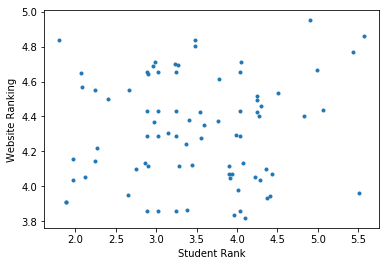

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

x = results['Student Rank']
y = results['Website Ranking']
plt.plot(x, y, '.')
plt.xlabel('Student Rank')
plt.ylabel('Website Ranking')

To create a line of best fit:

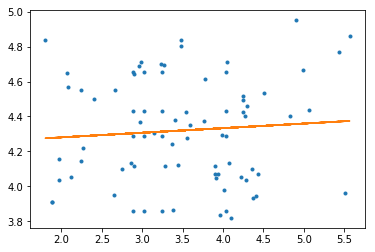

In [41]:
import numpy as np

x = results['Student Rank']
y = results['Website Ranking']
fit = np.polyfit(x, y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y,'.', x, fit_fn(x))

We can create another column in the dataframe called "predicted ranking" that lists the predicted ranking from the student ranking and then calculate the residual to see the rollercoasters we had the hardest time predicting:

In [42]:
results['predicted ranking'] = fit_fn(results['Student Rank'])
results['residual'] = results['Website Ranking'] - results['predicted ranking']
results.sort_values(by = 'residual', ascending = True).head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Student Rank,Website Ranking,predicted ranking,residual
67,Steel Force,1997.0,200.0,75.0,5600.0,0.0,205.00,180.00,4.103713,3.81911,4.335691,-0.516581
78,Wildfire,2016.0,183.8,71.5,4150.3,3.0,160.80,120.00,3.956877,3.83594,4.331831,-0.495891
20,Goliath,2000.0,235.0,85.0,4500.0,0.0,255.00,180.00,4.033679,3.85663,4.333850,-0.477220
32,Goliath,2014.0,165.0,72.0,3100.0,2.0,180.00,125.23,3.249949,3.85663,4.313250,-0.456620
11,Fahrenheit,2008.0,121.0,58.0,2700.0,6.0,155.11,85.00,3.385075,3.86452,4.316802,-0.452282


R-squared is a measure of how well your model fits your data. Use the function below to calculate R-squared.

In [43]:
def rsquared(x, y, y_predicted):                   
    ybar = np.sum(y)/len(y)          
    ssreg = np.sum((y_predicted-ybar)**2)  
    sstot = np.sum((y - ybar)**2)  
    return ssreg / sstot

rsquared(results['Student Rank'], 
         results['Website Ranking'], 
         results['predicted ranking'])

0.0061035777529196596

This is terrible! We can do a lot better if we use a least squares regression.

## 6. Linear Algebra Application: Least Squares Regression

Let's drop these student rankings to do the next section:

In [44]:
results = results.drop(columns=['Student Rank', 'predicted ranking', 'residual'])
results.head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Website Ranking
0,Afterburn,1999.0,113.0,62.0,2956.0,6.0,155.11,167.0,4.12364
1,Alpengeist,1997.0,195.0,67.0,3828.0,6.0,170.00,190.0,4.07299
2,Apollo's Chariot,1999.0,170.0,73.0,4882.0,0.0,210.00,135.0,4.35109
3,Banshee,2014.0,167.0,68.0,4124.0,7.0,150.00,160.0,4.53636
4,Beast,1979.0,110.0,64.8,7359.0,0.0,141.00,250.0,4.29122


Let's turn the ranking column into matrix B and the other quantitative data into matrix A in order to perform a least squares approximation:

In [45]:
B = results['Website Ranking'].values
A = results.drop(columns=['Name', 'Website Ranking']).values

We'll convert them into numpy matrices. Since B comes in as a row vector, we'll change it to a column vector:

In [46]:
A=np.matrix(A)
B=np.matrix(B)
B=B.T

Typically, we like to normalize each column of A by dividing by the maximum in each column. That way, each column is only on a scale of 0-1 so that numbers that are on larger scales (like years) don't overshadow numbers that are on smaller scales (like number of inversions):

In [47]:
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        A[:,j] = A[:,j]/max(A[:,j])

Now, we can find our least squares approximation for the weightings:

http://math.mit.edu/~gs/linearalgebra/ila0403.pdf

In [48]:
from scipy import linalg
X=linalg.inv(A.T*A)*(A.T)*B

To view the weightings in decending order, we can run the cell below:

In [49]:
categories = ['Year/Date Opened', 'Height (feet)', 'Speed (mph)',
       'Length (feet)', 'Number of Inversions', 'Drop (feet)',
       'Duration (sec)']

dictionary = {}
tuples = []
for i in range(len(categories)):
    dictionary[categories[i]] = round(X[i][0,0], 10)
    tuples.append((round(X[i][0,0], 10), categories[i]))
tuples.sort(reverse = True)

for i in range(len(categories)):
    print(tuples[i])

(4.4533107305, 'Year/Date Opened')
(0.4703072402, 'Length (feet)')
(0.1418642579, 'Height (feet)')
(-0.1418191818, 'Drop (feet)')
(-0.1661688039, 'Number of Inversions')
(-0.2520735697, 'Duration (sec)')
(-0.2842134895, 'Speed (mph)')


What is the average absolute error of our approximation?

In [50]:
error = 0
for i in range(len(A)):
    projection = A[i][:]*X
    newerror = abs(projection[0,0] - B[i,0])
    error = error + newerror
print('Average Absolute Prediction Error:', error/len(A))


Average Absolute Prediction Error: 0.2342764878226839


We can add a new column to our results matrix that includes our approximate ranking for each coaster:

In [51]:
results['Least Squares Ranking']=sum([results[cat]*dictionary[cat] for cat in categories])
results.head()

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Website Ranking,Least Squares Ranking
0,Afterburn,1999.0,113.0,62.0,2956.0,6.0,155.11,167.0,4.12364,10225.714905
1,Alpengeist,1997.0,195.0,67.0,3828.0,6.0,170.00,190.0,4.07299,10629.218619
2,Apollo's Chariot,1999.0,170.0,73.0,4882.0,0.0,210.00,135.0,4.35109,11137.765476
3,Banshee,2014.0,167.0,68.0,4124.0,7.0,150.00,160.0,4.53636,10850.111854
4,Beast,1979.0,110.0,64.8,7359.0,0.0,141.00,250.0,4.29122,12188.266053


In sorted order of our approximations:

In [52]:
results.sort_values(by=['Least Squares Ranking'], ascending=False)[0:10]

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Website Ranking,Least Squares Ranking
4,Beast,1979.0,110.0,64.8,7359.0,0.0,141.00,250.00,4.29122,12188.266053
13,Fury 325,2015.0,325.0,95.0,6602.0,0.0,320.00,125.23,4.85938,12020.545813
49,Millennium Force,2000.0,310.0,93.0,6595.0,0.0,300.00,140.00,4.77000,11948.007721
76,Voyage,2006.0,159.0,67.0,6442.0,0.0,154.00,165.00,4.70924,11903.142387
68,Steel Vengeance,2018.0,205.0,74.0,5740.0,4.0,200.00,150.00,4.95074,11627.555441
42,Leviathan,2012.0,306.0,92.0,5486.0,0.0,306.00,208.00,4.66327,11461.601559
67,Steel Force,1997.0,200.0,75.0,5600.0,0.0,205.00,180.00,3.81911,11459.592739
5,Behemoth,2008.0,230.0,77.0,5318.0,0.0,155.11,125.23,4.49624,11400.521444
54,Nitro,2001.0,230.0,80.0,5394.0,0.0,215.00,140.00,4.45918,11392.022302
65,Ride of Steel,1999.0,208.0,73.0,5400.0,0.0,205.00,122.00,4.13386,11390.761520


Notice that out of the top 10 rankings below from the website, we have four in our least squares list (Fury 325, Millenium Force, Voyage, Steel Vengeance). Perhaps our least squares #1 ranking, Beast, finds a coaster that doesn't get enough due on the website list:

In [53]:
results.sort_values(by=['Website Ranking'], ascending=False)[0:10]

,Name,Year/Date Opened,Height (feet),Speed (mph),Length (feet),Number of Inversions,Drop (feet),Duration (sec),Website Ranking,Least Squares Ranking
68,Steel Vengeance,2018.0,205.0,74.0,5740.0,4.0,200.00,150.00,4.95074,11627.555441
13,Fury 325,2015.0,325.0,95.0,6602.0,0.0,320.00,125.23,4.85938,12020.545813
9,El Toro,2006.0,181.0,70.0,4400.0,0.0,176.00,102.00,4.83784,10957.803989
10,El Toro,2009.0,80.5,45.6,2379.0,0.0,155.11,125.23,4.83784,10010.457373
43,Lightning Rod,2016.0,207.0,73.0,3800.0,0.0,165.00,125.23,4.80208,10718.692924
49,Millennium Force,2000.0,310.0,93.0,6595.0,0.0,300.00,140.00,4.77000,11948.007721
6,Boulder Dash,2000.0,110.0,60.0,4725.0,0.0,115.00,150.00,4.71429,11073.255189
76,Voyage,2006.0,159.0,67.0,6442.0,0.0,154.00,165.00,4.70924,11903.142387
37,Iron Rattler,2013.0,179.0,70.0,3266.0,1.0,171.00,125.23,4.69863,10450.052283
47,Maverick,2007.0,105.0,70.0,4450.0,2.0,100.00,150.00,4.69528,10973.337367


If we want to plot our rankings versus the website's rankings, we can type:

Text(0, 0.5, 'Website Ranking')

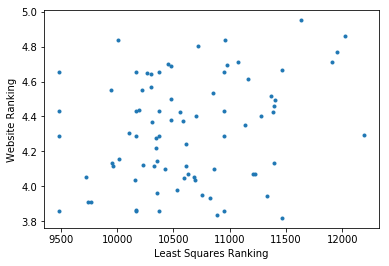

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

x = results['Least Squares Ranking']
y = results['Website Ranking']
plt.plot(x, y, '.')
plt.xlabel('Least Squares Ranking')
plt.ylabel('Website Ranking')

To superimpose a linear regression:

Text(0, 0.5, 'Website Ranking')

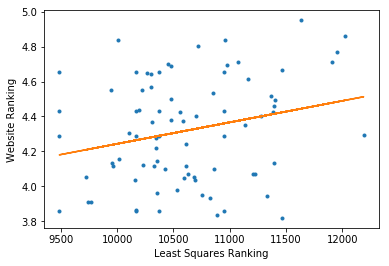

In [55]:
fit = np.polyfit(x, y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y,'.', x, fit_fn(x))
plt.xlabel('Least Squares Ranking')
plt.ylabel('Website Ranking')

Our r-squared value (though still not great) is improved ten fold by using this least squares technique:

In [56]:
results['predicted ranking'] = fit_fn(results['Least Squares Ranking'])

rsquared(results['Least Squares Ranking'], 
         results['Website Ranking'], 
         results['predicted ranking'])

0.061234367504442715